In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
df = pd.read_csv('C:/Users/HP/Desktop/Diwali Sales Analysis/Diwali Sales Data.csv', encoding = 'unicode_escape')

# Data Cleaning & Preparation

In [9]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [11]:
df.shape

(11251, 15)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


# Drop Unnecessary Columns and Handling Missing Values

In [19]:
# drop unrelated/blank columns
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [24]:
# check for null values
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [31]:
# drop null values
df.dropna(inplace = True)

In [33]:
df.shape

(11239, 13)

In [35]:
df['Amount'] = df['Amount'].astype('int')

In [37]:
df['Amount'].dtypes

dtype('int32')

In [39]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [41]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [43]:
# use describe for specific columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis (EDA)

## Gender Distribution of Customers

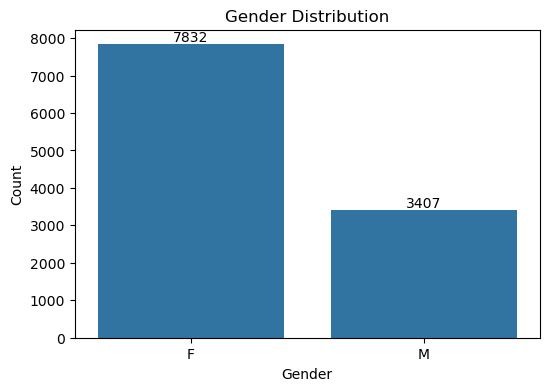

In [59]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

From the above chart, we can clearly see that the majority of customers are female shoppers during the Diwali sales period.

## Total Spending by Gender

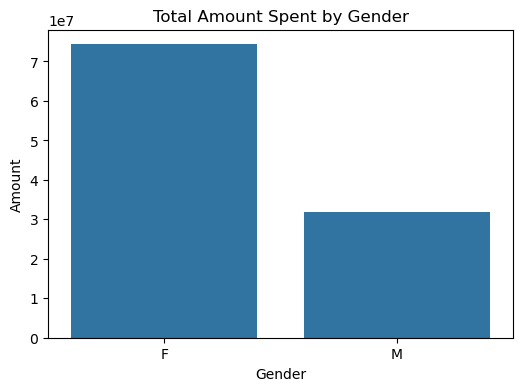

In [98]:
plt.figure(figsize=(6,4))
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)
plt.title('Total Amount Spent by Gender')
plt.show()

From the above chart, we can clearly see that female customers spent more than male customers during the Diwali sales period

## Age Group Distribution

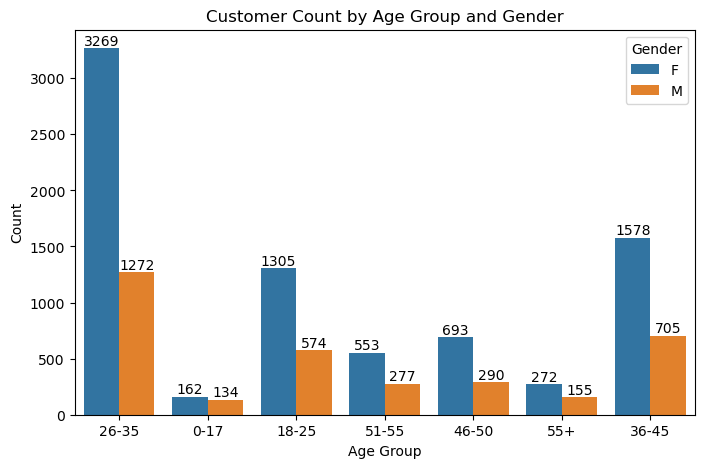

In [88]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = 'Age Group', hue = 'Gender', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Customer Count by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

From the above chart, we can clearly see that the majority of customers during the Diwali sales belong to the 26-35 age group.

## Age Group Spending

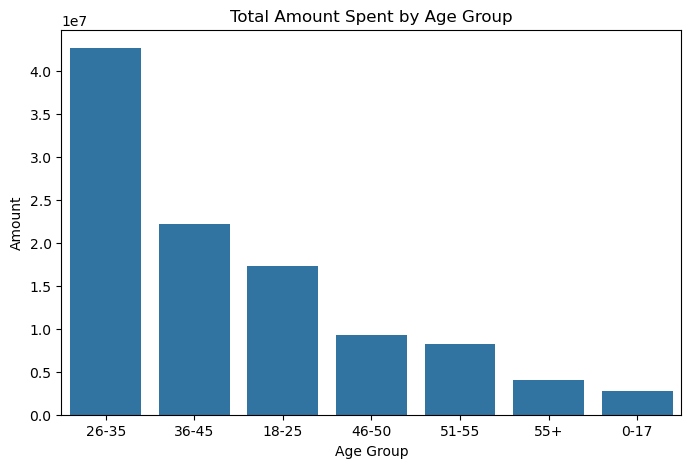

In [100]:
plt.figure(figsize=(8,5))
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)
plt.title('Total Amount Spent by Age Group')
plt.show()

From the above chart, we can clearly see that the customers in the 26-35 age group have the highest total spending during the Diwali sales.

## Total Number of Orders from Top 10 States

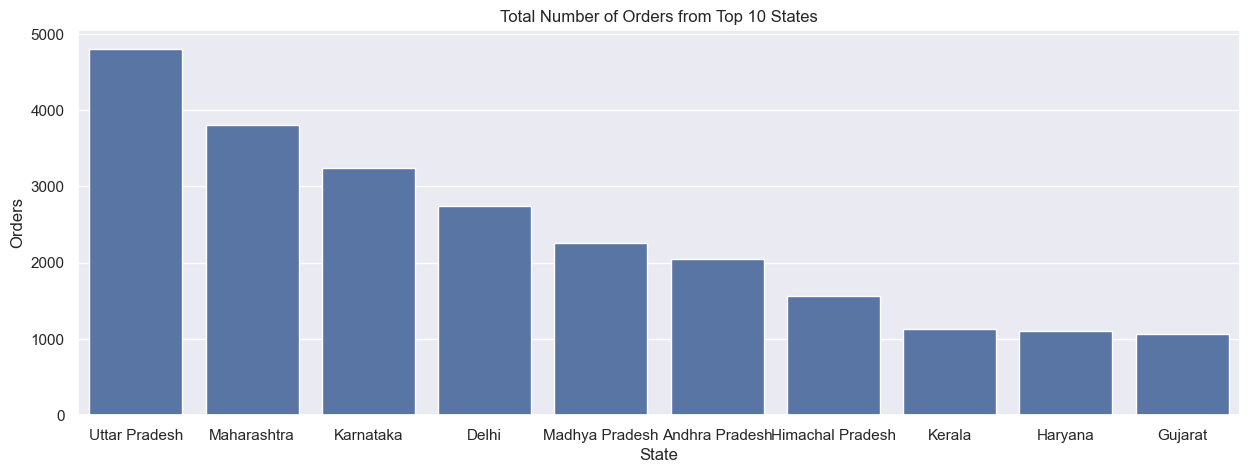

In [140]:
sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Orders', data = sales_state)
plt.title('Total Number of Orders from Top 10 States')
plt.show()

From the above chart, we can clearly see that Uttar Pradesh, Maharashtra and Karnataka are the top three states with the highest number of orders during the Diwali sales period.

##  Total Amount/Sales from Top 10 States

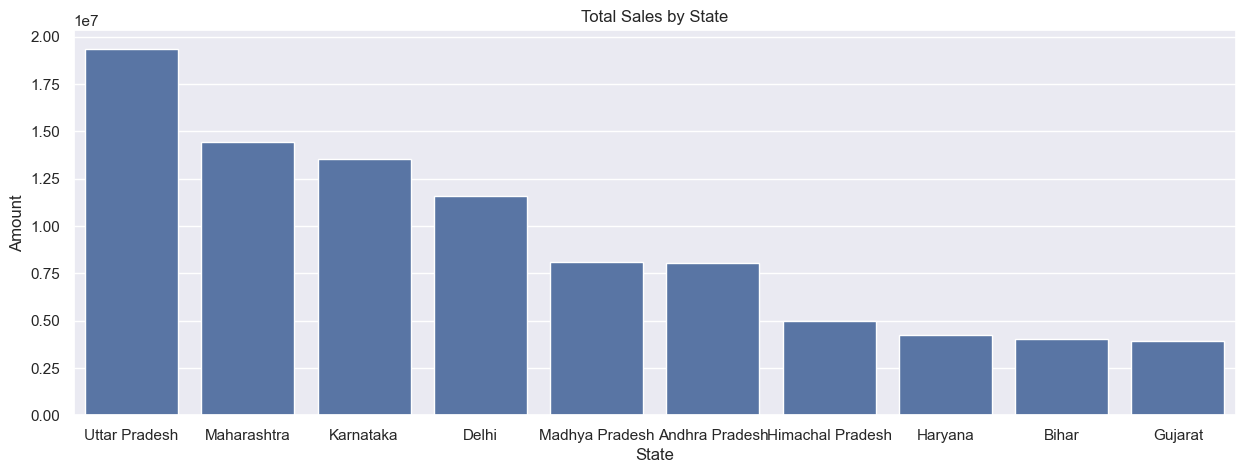

In [136]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'State', y = 'Amount', data = sales_state)
plt.title('Total Sales by State')
plt.show()

From the above chart, we can clearly see that Uttar Pradesh, Maharashtra and Karnataka generated the highest total sales during the Diwali sales period.

## Distribution of Customers based on their  Marital Status

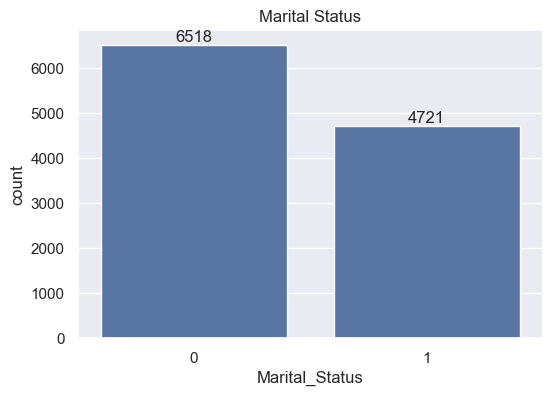

In [150]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = 'Marital_Status', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Marital Status')
plt.show()

From the above chart, we can clearly see that the majority of customers during the Diwali sales are married individuals.

## Impact of Marital Status and Gender on Total Sales

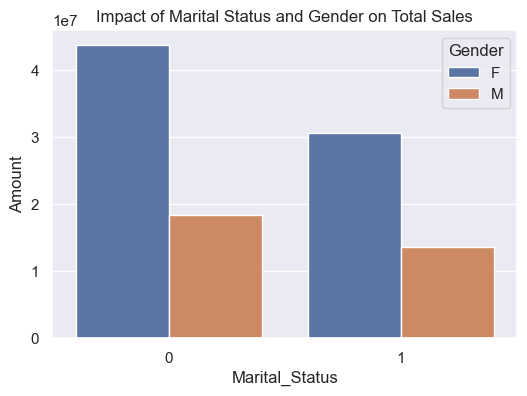

In [163]:
plt.figure(figsize=(6,4))
sales_state = df.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x = 'Marital_Status', y = 'Amount', hue = 'Gender', data = sales_state)
plt.title('Impact of Marital Status and Gender on Total Sales')
plt.show()

From the above chart, we can clearly see that married women contribute the highest sales amount compared to other groups, indicating a strong purchasing influence during Diwali sales.

## Customer Distribution by Occupation

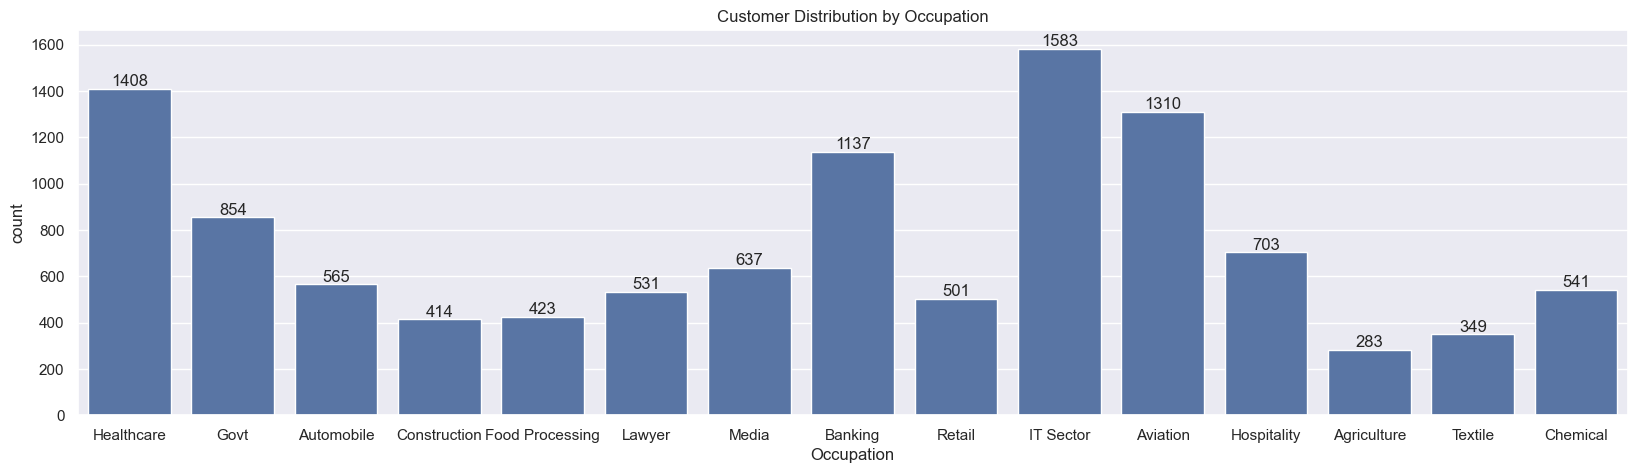

In [186]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(x = 'Occupation', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Customer Distribution by Occupation')
plt.show()

From the above chart, we can clearly see that most customers belong to the IT Sector, followed by Healthcare and Aviation professionals during the Diwali sales period.

## Total Sales by Occupation

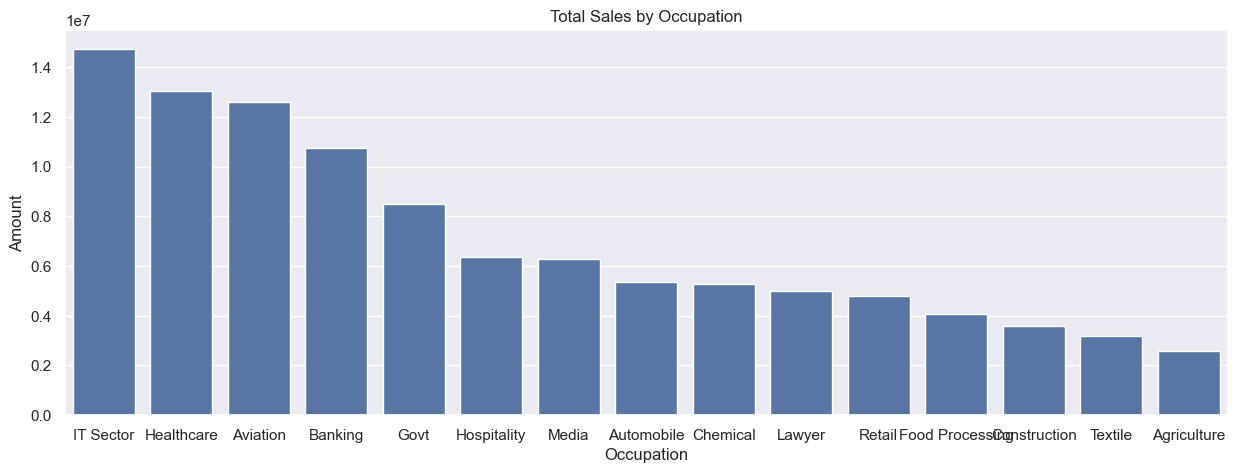

In [188]:
sales_state = df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(x = 'Occupation', y = 'Amount', data = sales_state)
plt.title('Total Sales by Occupation')
plt.show()

From the above chart, we can clearly see that customers from the IT Sector, Healthcare, and Aviation contribute the highest to total sales during the Diwali sales period.

## Customer Distribution by Product Category

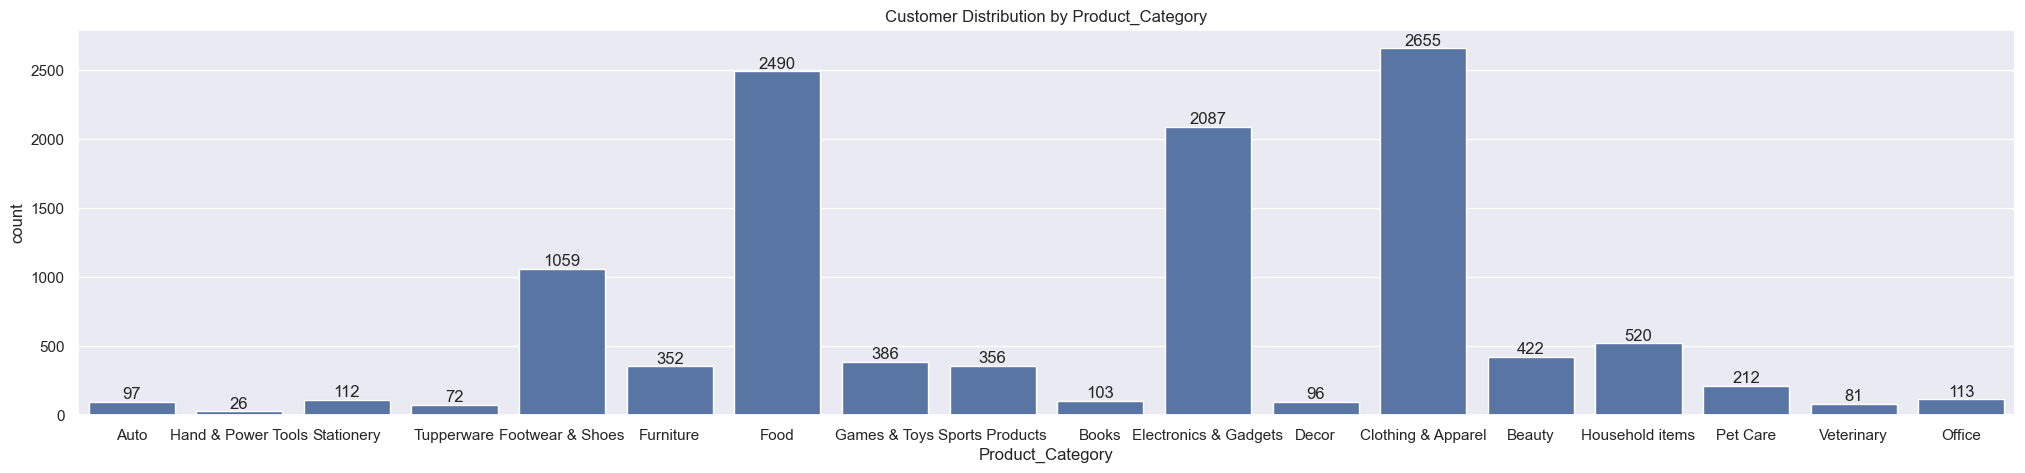

In [200]:
sns.set(rc={'figure.figsize':(25,5)})
ax = sns.countplot(x = 'Product_Category', data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Customer Distribution by Product_Category')
plt.show()

From the above chart, we can clearly see that  most customers purchased products from the Clothing & Apparel, Food and Electronics & Gadgets categories during the Diwali sales.

## Total Sales by Product Category

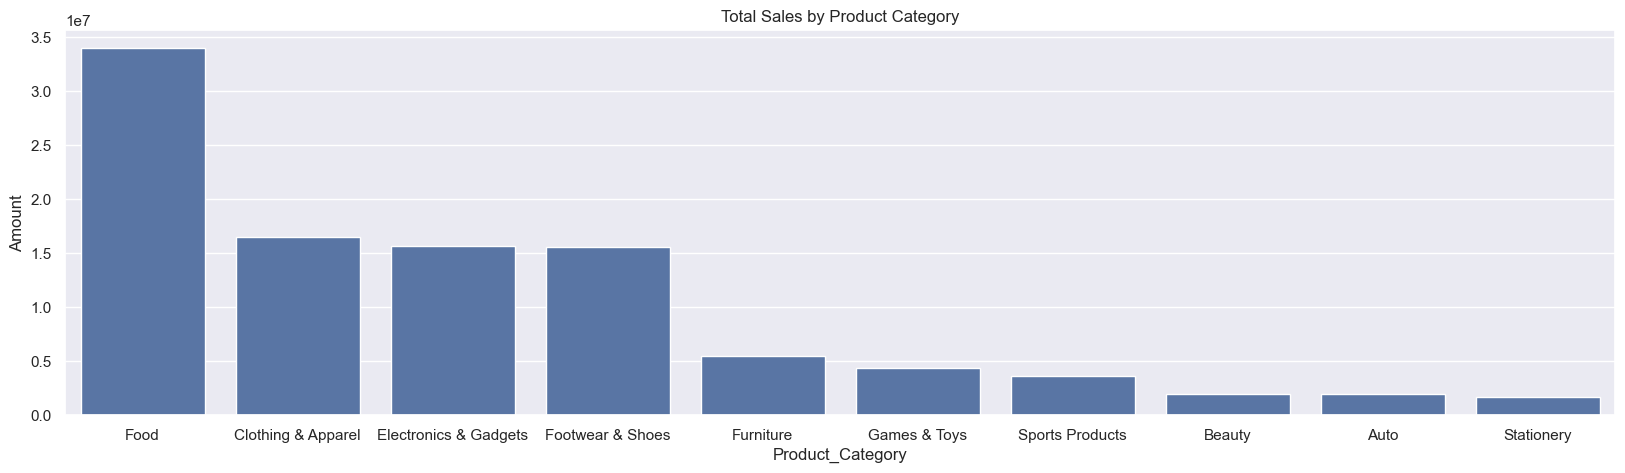

In [219]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_state)
plt.title('Total Sales by Product Category')
plt.show()

From the above chart, we can clearly see that Food, Clothing & Apparel and Electronics are the top-selling categories, contributing significantly to the overall Diwali sales.

## Top-Selling Products


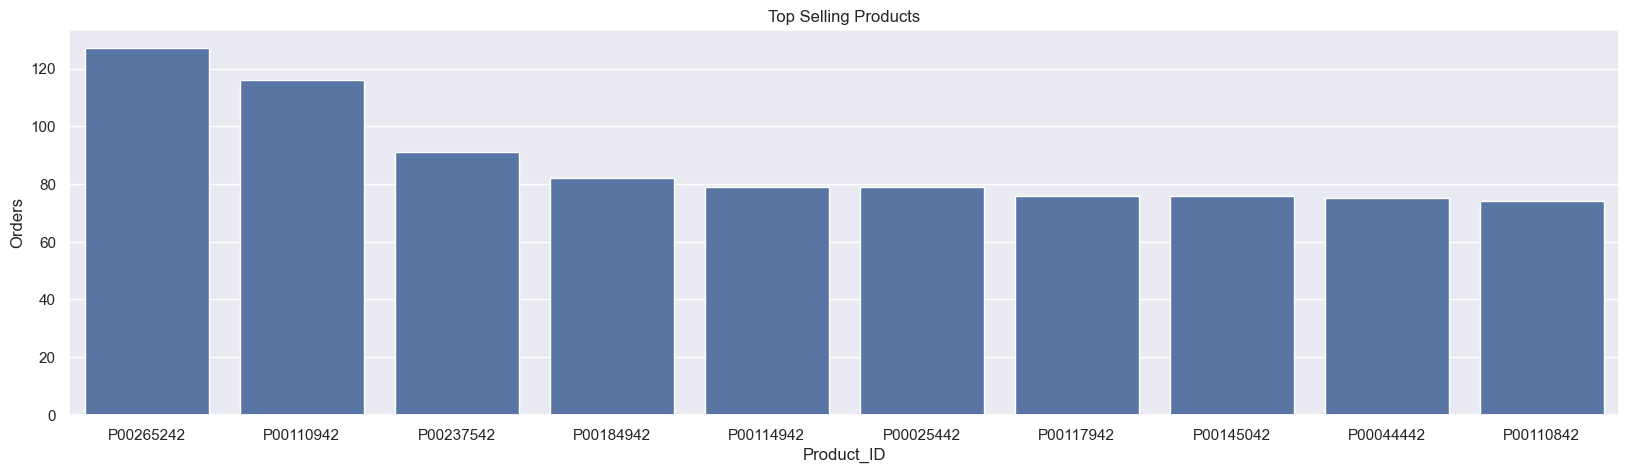

In [236]:
sales_state = df.groupby(['Product_ID'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x = 'Product_ID', y = 'Orders', data = sales_state)
plt.title('Top Selling Products')
plt.show()

From the above chart, we can clearly see that products with Product_IDs P00265242, P00110942, and P00237542 are the top selling products during the Diwali sales, based on the highest number of orders.

## Conclusion:

Married Women age group 26-35 years from UP, Maharashtra and Karnataka working in IT, HealthCare and Aviation are more likely to buy products from Food, Clothing and Electronics Category.